#### Compare the approach of a Frequentist to a Bayesian on a simple 1-dimensional problem

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(1)  # for repeatability

In [2]:
'''Generate some data. This is meant to simulate photon counts from a star '''
F_true = 1000                       # Number of photons measured in 1 second
N = 50                              # number of measurements
F = stats.poisson(F_true).rvs(N)    # These are the counts
e = np.sqrt(F)                      # errors on Poisson counts estimated via square root

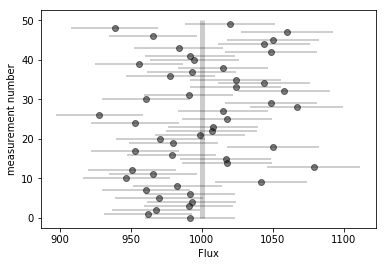

In [3]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux");ax.set_ylabel("measurement number");

In [4]:
# Frequentist
w = 1. / e ** 2
print("F_true = {0} \nF_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)".\
      format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))

F_true = 1000 
F_est  = 998 +/- 4 (based on 50 measurements)


##### Bayesian

In [5]:
def log_prior(theta):
    return 1  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

In [6]:
ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

/home/tbrownex/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'P(F)')

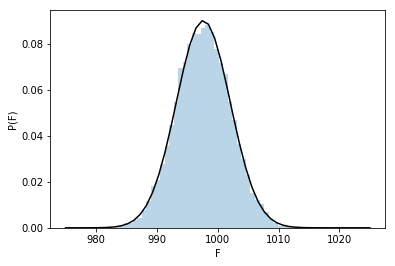

In [7]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True)

# plot a best-fit Gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)")

In [8]:
print("F_true = {0} \nF_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)".\
      format(F_true, np.mean(sample), np.std(sample), N))

F_true = 1000 
F_est  = 998 +/- 4 (based on 50 measurements)
